In [30]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Harshini/Downloads/Social_Network_Ads (1).csv")
df=pd.DataFrame(dataset)
df
 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [32]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [33]:
df[df.duplicated()]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])


In [35]:
x=df.drop(["Purchased"],axis=1)
y=df.iloc[:,4]


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [38]:
#fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [39]:
#predicting the test results
y_pred=model.predict(x_test)


In [40]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[54,  4],
       [ 2, 20]], dtype=int64)

In [41]:
#making accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.925

In [42]:
#making classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



In [43]:
#import roc_auc_score to calculate the area under the curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [44]:
#visualizing the ROC-AUC curve
y_proba=model.predict_proba(x_test)

In [45]:
#we take the predicted value of class 1
y_predicted=y_proba[:,1]

In [46]:
#we check to see if the right values hve been considered from the predicted values
print(y_predicted)

[0.  0.  0.  0.  0.  0.  0.  1.  0.  0.7 0.  0.  0.1 0.3 0.  0.7 0.3 0.
 1.  0.  0.  1.  0.  0.9 0.  0.9 0.  0.  0.  0.3 0.2 0.1 0.9 0.  0.  0.
 0.  0.  0.  0.9 0.  0.  0.  0.1 0.6 0.  0.2 1.  0.  0.6 0.9 0.  0.1 0.7
 0.6 1.  0.  0.1 0.6 0.  0.  0.7 0.  1.  0.  0.7 0.  0.  0.  0.6 1.  0.1
 0.1 0.9 0.  0.  0.1 0.1 1.  0.5]


In [47]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [48]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9733542319749215


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

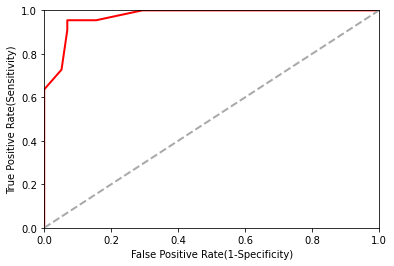

In [49]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='r',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

